# Statistics (`scipy.stats`)

In [1]:
from scipy import stats
from scipy.stats import norm
print('bounds of distribution lower: %s, upper: %s' % (norm.a, norm.b))

bounds of distribution lower: -inf, upper: inf


In [2]:
rv = norm()
dir(rv)  # reformatted

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'a',
 'args',
 'b',
 'cdf',
 'dist',
 'entropy',
 'expect',
 'interval',
 'isf',
 'kwds',
 'logcdf',
 'logpdf',
 'logpmf',
 'logsf',
 'mean',
 'median',
 'moment',
 'pdf',
 'pmf',
 'ppf',
 'random_state',
 'rvs',
 'sf',
 'stats',
 'std',
 'support',
 'var']

In [3]:
dist_continu = [d for d in dir(stats) if
                isinstance(getattr(stats, d), stats.rv_continuous)]
dist_discrete = [d for d in dir(stats) if
                 isinstance(getattr(stats, d), stats.rv_discrete)]
print('number of continuous distributions: %d' % len(dist_continu))
print('number of discrete distributions:   %d' % len(dist_discrete))

number of continuous distributions: 100
number of discrete distributions:   15


In [4]:
norm.cdf(0)

0.5

In [5]:
norm.cdf([-1., 0, 1])

import numpy as np
norm.cdf(np.array([-1., 0, 1]))

array([0.15865525, 0.5       , 0.84134475])

In [6]:
norm.mean(), norm.std(), norm.var()

(0.0, 1.0, 1.0)

In [7]:
norm.stats(moments="mv")

(array(0.), array(1.))

In [8]:
norm.ppf(0.5)

0.0

In [9]:
norm.rvs(size=3)

array([0.39257733, 0.88089906, 0.48033911])

In [12]:
np.random.seed(1234)

In [13]:
norm.rvs(size=5, random_state=1234)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873])

In [14]:
norm.rvs(5)

5.471435163732493

In [15]:
norm.stats(loc=3, scale=4, moments="mv")

(array(3.), array(16.))

In [16]:
from scipy.stats import expon

expon.mean(scale=3.)

3.0

In [17]:
from scipy.stats import uniform
uniform.cdf([0, 1, 2, 3, 4, 5], loc=1, scale=4)

array([0.  , 0.  , 0.25, 0.5 , 0.75, 1.  ])

In [18]:
np.mean(norm.rvs(5, size=500))

5.009835510696999

In [19]:
from scipy.stats import gamma
print(gamma.numargs)
print(gamma.shapes)

1
a


In [20]:
gamma(1, scale=2.).stats(moments="mv")

(array(2.), array(4.))

In [23]:
rv = gamma(1, scale=2.)
rv.mean(), rv.std()

(2.0, 2.0)

In [24]:
stats.t.isf([0.1, 0.05, 0.01], [[10], [11]])

array([[1.37218364, 1.81246112, 2.76376946],
       [1.36343032, 1.79588482, 2.71807918]])

In [25]:
stats.t.isf([0.1, 0.05, 0.01], 10)

array([1.37218364, 1.81246112, 2.76376946])

In [26]:
stats.t.isf([0.1, 0.05, 0.01], 11)

array([1.36343032, 1.79588482, 2.71807918])

In [27]:
stats.t.isf([0.1, 0.05, 0.01], [10, 11, 12])

array([1.37218364, 1.79588482, 2.68099799])

In [33]:
from scipy.stats import hypergeom
[M, n, N] = [20, 7, 12]
x = np.arange(4)*2
print(x)

prb = hypergeom.cdf(x, M, n, N)
print(prb)

[0 2 4 6]
[1.03199174e-04 5.21155831e-02 6.08359133e-01 9.89783282e-01]


In [32]:
hypergeom.ppf(prb, M, n, N)

array([0., 2., 4., 6.])

In [34]:
hypergeom.ppf(prb + 1e-8, M, n, N)

array([1., 3., 5., 7.])

In [35]:
hypergeom.ppf(prb - 1e-8, M, n, N)

array([0., 2., 4., 6.])

In [36]:
from scipy import stats
class deterministic_gen(stats.rv_continuous):
    def _cdf(self, x):
        return np.where(x < 0, 0., 1.)
    def _stats(self):
        return 0., 0., 0., 0.

In [37]:
deterministic = deterministic_gen(name="deterministic")
deterministic.cdf(np.arange(-3, 3, 0.5))

array([0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.])

In [38]:
deterministic.pdf(np.arange(-3, 3, 0.5))

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.83333333e+04, 4.16333634e-12,
       4.16333634e-12, 4.16333634e-12, 4.16333634e-12, 4.16333634e-12])

In [39]:
from scipy.integrate import quad
quad(deterministic.pdf, -1e-1, 1e-1)

(4.163336342344337e-13, 0.0)

In [40]:
quad(deterministic.pdf, -1e-3, 1e-3)  # warning removed

/Users/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  """Entry point for launching an IPython kernel.


(1.000076872229173, 0.0010625571718182458)

In [41]:
npoints = 20   # number of integer support points of the distribution minus 1
npointsh = npoints // 2
npointsf = float(npoints)
nbound = 4   # bounds for the truncated normal
normbound = (1+1/npointsf) * nbound   # actual bounds of truncated normal
grid = np.arange(-npointsh, npointsh+2, 1)   # integer grid
gridlimitsnorm = (grid-0.5) / npointsh * nbound   # bin limits for the truncnorm
gridlimits = grid - 0.5   # used later in the analysis
grid = grid[:-1]
probs = np.diff(stats.truncnorm.cdf(gridlimitsnorm, -normbound, normbound))
gridint = grid

normdiscrete = stats.rv_discrete(values=(gridint,
             np.round(probs, decimals=7)), name='normdiscrete')

print('mean = %6.4f, variance = %6.4f, skew = %6.4f, kurtosis = %6.4f' %
      normdiscrete.stats(moments='mvsk'))

mean = -0.0000, variance = 6.3302, skew = 0.0000, kurtosis = -0.0076


In [43]:
nd_std = np.sqrt(normdiscrete.stats(moments='v'))

n_sample = 500
np.random.seed(87655678)   # fix the seed for replicability
rvs = normdiscrete.rvs(size=n_sample)
f, l = np.histogram(rvs, bins=gridlimits)
sfreq = np.vstack([gridint, f, probs*n_sample]).T
print(sfreq)

[[-1.00000000e+01  0.00000000e+00  2.95019349e-02]
 [-9.00000000e+00  0.00000000e+00  1.32294142e-01]
 [-8.00000000e+00  0.00000000e+00  5.06497902e-01]
 [-7.00000000e+00  2.00000000e+00  1.65568919e+00]
 [-6.00000000e+00  1.00000000e+00  4.62125309e+00]
 [-5.00000000e+00  9.00000000e+00  1.10137298e+01]
 [-4.00000000e+00  2.60000000e+01  2.24137683e+01]
 [-3.00000000e+00  3.70000000e+01  3.89503370e+01]
 [-2.00000000e+00  5.10000000e+01  5.78004747e+01]
 [-1.00000000e+00  7.10000000e+01  7.32455414e+01]
 [ 0.00000000e+00  7.40000000e+01  7.92618251e+01]
 [ 1.00000000e+00  8.90000000e+01  7.32455414e+01]
 [ 2.00000000e+00  5.50000000e+01  5.78004747e+01]
 [ 3.00000000e+00  5.00000000e+01  3.89503370e+01]
 [ 4.00000000e+00  1.70000000e+01  2.24137683e+01]
 [ 5.00000000e+00  1.10000000e+01  1.10137298e+01]
 [ 6.00000000e+00  4.00000000e+00  4.62125309e+00]
 [ 7.00000000e+00  3.00000000e+00  1.65568919e+00]
 [ 8.00000000e+00  0.00000000e+00  5.06497902e-01]
 [ 9.00000000e+00  0.00000000e+

In [45]:
f2 = np.hstack([f[:5].sum(), f[5:-5], f[-5:].sum()])
p2 = np.hstack([probs[:5].sum(), probs[5:-5], probs[-5:].sum()])
ch2, pval = stats.chisquare(f2, p2*n_sample)

print('chisquare for normdiscrete: chi2 = %6.3f pvalue = %6.4f' % (ch2, pval))

chisquare for normdiscrete: chi2 = 12.466 pvalue = 0.4090


In [47]:
np.random.seed(282629734)
x = stats.t.rvs(10, size=1000)
print(x.min())   # equivalent to np.min(x)
print(x.max())   # equivalent to np.max(x)
print(x.mean())  # equivalent to np.mean(x)
print(x.var())   # equivalent to np.var(x))

-3.7897557242248197
5.263277329807165
0.014061066398468422
1.288993862079285


In [49]:
m, v, s, k = stats.t.stats(10, moments='mvsk')
n, (smin, smax), sm, sv, ss, sk = stats.describe(x)

sstr = '%-14s mean = %6.4f, variance = %6.4f, skew = %6.4f, kurtosis = %6.4f'
print(sstr % ('distribution:', m, v, s ,k))

print(sstr % ('sample:', sm, sv, ss, sk))

distribution:  mean = 0.0000, variance = 1.2500, skew = 0.0000, kurtosis = 1.0000
sample:        mean = 0.0141, variance = 1.2903, skew = 0.2165, kurtosis = 1.0556


In [50]:
print('t-statistic = %6.3f pvalue = %6.4f' %  stats.ttest_1samp(x, m))

t-statistic =  0.391 pvalue = 0.6955


In [51]:
tt = (sm-m)/np.sqrt(sv/float(n))  # t-statistic for mean
pval = stats.t.sf(np.abs(tt), n-1)*2  # two-sided pvalue = Prob(abs(t)>tt)
print('t-statistic = %6.3f pvalue = %6.4f' % (tt, pval))

t-statistic =  0.391 pvalue = 0.6955


In [52]:
print('KS-statistic D = %6.3f pvalue = %6.4f' % stats.kstest(x, 't', (10,)))

KS-statistic D =  0.016 pvalue = 0.9606


In [53]:
print('KS-statistic D = %6.3f pvalue = %6.4f' % stats.kstest(x, 'norm'))

KS-statistic D =  0.028 pvalue = 0.3949


In [54]:
d, pval = stats.kstest((x-x.mean())/x.std(), 'norm')
print('KS-statistic D = %6.3f pvalue = %6.4f' % (d, pval))

KS-statistic D =  0.032 pvalue = 0.2402


In [55]:
crit01, crit05, crit10 = stats.t.ppf([1-0.01, 1-0.05, 1-0.10], 10)
print('critical values from ppf at 1%%, 5%% and 10%% %8.4f %8.4f %8.4f' % (crit01, crit05, crit10))

print('critical values from isf at 1%%, 5%% and 10%% %8.4f %8.4f %8.4f' % tuple(stats.t.isf([0.01,0.05,0.10],10)))

critical values from ppf at 1%, 5% and 10%   2.7638   1.8125   1.3722
critical values from isf at 1%, 5% and 10%   2.7638   1.8125   1.3722


In [56]:
freq01 = np.sum(x>crit01) / float(n) * 100
freq05 = np.sum(x>crit05) / float(n) * 100
freq10 = np.sum(x>crit10) / float(n) * 100
print('sample %%-frequency at 1%%, 5%% and 10%% tail %8.4f %8.4f %8.4f' % (freq01, freq05, freq10))

sample %-frequency at 1%, 5% and 10% tail   1.4000   5.8000  10.5000


In [57]:
freq05l = np.sum(stats.t.rvs(10, size=10000) > crit05) / 10000.0 * 100
print('larger sample %%-frequency at 5%% tail %8.4f' % freq05l)

larger sample %-frequency at 5% tail   4.8000


In [58]:
print('tail prob. of normal at 1%%, 5%% and 10%% %8.4f %8.4f %8.4f' %
      tuple(stats.norm.sf([crit01, crit05, crit10])*100))

tail prob. of normal at 1%, 5% and 10%   0.2857   3.4957   8.5003


In [60]:
quantiles = [0.0, 0.01, 0.05, 0.1, 1-0.10, 1-0.05, 1-0.01, 1.0]
crit = stats.t.ppf(quantiles, 10)
crit

array([       -inf, -2.76376946, -1.81246112, -1.37218364,  1.37218364,
        1.81246112,  2.76376946,         inf])

In [61]:
n_sample = x.size
freqcount = np.histogram(x, bins=crit)[0]
tprob = np.diff(quantiles)
nprob = np.diff(stats.norm.cdf(crit))
tch, tpval = stats.chisquare(freqcount, tprob*n_sample)
nch, npval = stats.chisquare(freqcount, nprob*n_sample)
print('chisquare for t:      chi2 = %6.2f pvalue = %6.4f' % (tch, tpval))
print('chisquare for normal: chi2 = %6.2f pvalue = %6.4f' % (nch, npval))

chisquare for t:      chi2 =   2.30 pvalue = 0.8901
chisquare for normal: chi2 =  64.60 pvalue = 0.0000


In [62]:
tdof, tloc, tscale = stats.t.fit(x)
nloc, nscale = stats.norm.fit(x)
tprob = np.diff(stats.t.cdf(crit, tdof, loc=tloc, scale=tscale))
nprob = np.diff(stats.norm.cdf(crit, loc=nloc, scale=nscale))
tch, tpval = stats.chisquare(freqcount, tprob*n_sample)
nch, npval = stats.chisquare(freqcount, nprob*n_sample)
print('chisquare for t:      chi2 = %6.2f pvalue = %6.4f' % (tch, tpval))
print('chisquare for normal: chi2 = %6.2f pvalue = %6.4f' % (nch, npval))

chisquare for t:      chi2 =   1.58 pvalue = 0.9542
chisquare for normal: chi2 =  11.08 pvalue = 0.0858


In [63]:
print('normal skewtest teststat = %6.3f pvalue = %6.4f' % stats.skewtest(x))
print('normal kurtosistest teststat = %6.3f pvalue = %6.4f' % stats.kurtosistest(x))

normal skewtest teststat =  2.785 pvalue = 0.0054
normal kurtosistest teststat =  4.757 pvalue = 0.0000


In [64]:
print('normaltest teststat = %6.3f pvalue = %6.4f' % stats.normaltest(x))

normaltest teststat = 30.379 pvalue = 0.0000


In [65]:
print('normaltest teststat = %6.3f pvalue = %6.4f' %
      stats.normaltest((x-x.mean())/x.std()))

normaltest teststat = 30.379 pvalue = 0.0000


In [66]:
print('normaltest teststat = %6.3f pvalue = %6.4f' %
      stats.normaltest(stats.t.rvs(10, size=100)))
print('normaltest teststat = %6.3f pvalue = %6.4f' %
             stats.normaltest(stats.norm.rvs(size=1000)))

normaltest teststat =  4.698 pvalue = 0.0955
normaltest teststat =  0.613 pvalue = 0.7361


In [67]:
rvs1 = stats.norm.rvs(loc=5, scale=10, size=500)
rvs2 = stats.norm.rvs(loc=5, scale=10, size=500)
stats.ttest_ind(rvs1, rvs2)

Ttest_indResult(statistic=-0.5489036175088705, pvalue=0.5831943748663959)

In [68]:
rvs3 = stats.norm.rvs(loc=8, scale=10, size=500)
stats.ttest_ind(rvs1, rvs3)

Ttest_indResult(statistic=-4.533414290175026, pvalue=6.507128186389019e-06)

In [69]:
stats.ks_2samp(rvs1, rvs2)

Ks_2sampResult(statistic=0.026, pvalue=0.9959527565364388)

In [70]:
stats.ks_2samp(rvs1, rvs3)

Ks_2sampResult(statistic=0.114, pvalue=0.00299005061044668)

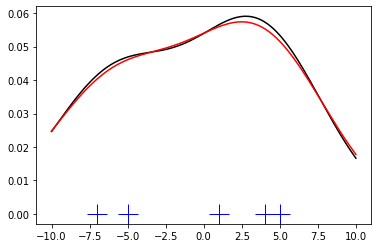

In [72]:
from scipy import stats
import matplotlib.pyplot as plt

x1 = np.array([-7, -5, 1, 4, 5], dtype=np.float)
kde1 = stats.gaussian_kde(x1)
kde2 = stats.gaussian_kde(x1, bw_method='silverman')

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x1, np.zeros(x1.shape), 'b+', ms=20)  # rug plot
x_eval = np.linspace(-10, 10, num=200)
ax.plot(x_eval, kde1(x_eval), 'k-', label="Scott's Rule")
ax.plot(x_eval, kde2(x_eval), 'r-', label="Silverman's Rule")

plt.show()

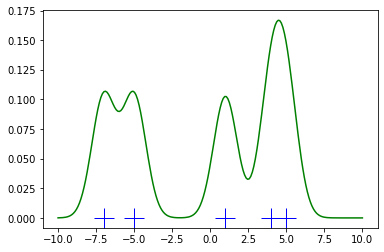

In [73]:
def my_kde_bandwidth(obj, fac=1./5):
    """We use Scott's Rule, multiplied by a constant factor."""
    return np.power(obj.n, -1./(obj.d+4)) * fac

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x1, np.zeros(x1.shape), 'b+', ms=20)  # rug plot
kde3 = stats.gaussian_kde(x1, bw_method=my_kde_bandwidth)
ax.plot(x_eval, kde3(x_eval), 'g-', label="With smaller BW")

plt.show()

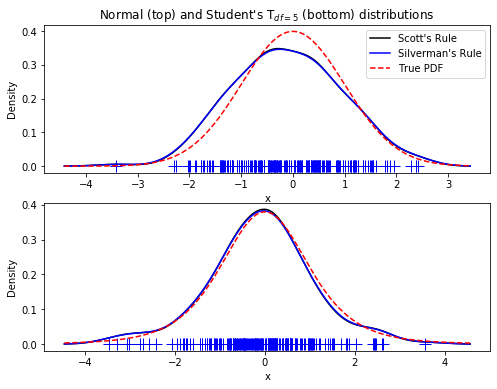

In [74]:
np.random.seed(12456)
x1 = np.random.normal(size=200)  # random data, normal distribution
xs = np.linspace(x1.min()-1, x1.max()+1, 200)

kde1 = stats.gaussian_kde(x1)
kde2 = stats.gaussian_kde(x1, bw_method='silverman')

fig = plt.figure(figsize=(8, 6))

ax1 = fig.add_subplot(211)
ax1.plot(x1, np.zeros(x1.shape), 'b+', ms=12)  # rug plot
ax1.plot(xs, kde1(xs), 'k-', label="Scott's Rule")
ax1.plot(xs, kde2(xs), 'b-', label="Silverman's Rule")
ax1.plot(xs, stats.norm.pdf(xs), 'r--', label="True PDF")

ax1.set_xlabel('x')
ax1.set_ylabel('Density')
ax1.set_title("Normal (top) and Student's T$_{df=5}$ (bottom) distributions")
ax1.legend(loc=1)

x2 = stats.t.rvs(5, size=200)  # random data, T distribution
xs = np.linspace(x2.min() - 1, x2.max() + 1, 200)

kde3 = stats.gaussian_kde(x2)
kde4 = stats.gaussian_kde(x2, bw_method='silverman')

ax2 = fig.add_subplot(212)
ax2.plot(x2, np.zeros(x2.shape), 'b+', ms=12)  # rug plot
ax2.plot(xs, kde3(xs), 'k-', label="Scott's Rule")
ax2.plot(xs, kde4(xs), 'b-', label="Silverman's Rule")
ax2.plot(xs, stats.t.pdf(xs, 5), 'r--', label="True PDF")

ax2.set_xlabel('x')
ax2.set_ylabel('Density')

plt.show()

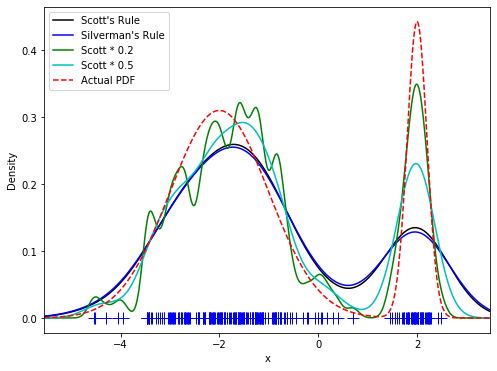

In [75]:
from functools import partial

loc1, scale1, size1 = (-2, 1, 175)
loc2, scale2, size2 = (2, 0.2, 50)
x2 = np.concatenate([np.random.normal(loc=loc1, scale=scale1, size=size1),
                     np.random.normal(loc=loc2, scale=scale2, size=size2)])

x_eval = np.linspace(x2.min() - 1, x2.max() + 1, 500)

kde = stats.gaussian_kde(x2)
kde2 = stats.gaussian_kde(x2, bw_method='silverman')
kde3 = stats.gaussian_kde(x2, bw_method=partial(my_kde_bandwidth, fac=0.2))
kde4 = stats.gaussian_kde(x2, bw_method=partial(my_kde_bandwidth, fac=0.5))

pdf = stats.norm.pdf
bimodal_pdf = pdf(x_eval, loc=loc1, scale=scale1) * float(size1) / x2.size + \
              pdf(x_eval, loc=loc2, scale=scale2) * float(size2) / x2.size

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

ax.plot(x2, np.zeros(x2.shape), 'b+', ms=12)
ax.plot(x_eval, kde(x_eval), 'k-', label="Scott's Rule")
ax.plot(x_eval, kde2(x_eval), 'b-', label="Silverman's Rule")
ax.plot(x_eval, kde3(x_eval), 'g-', label="Scott * 0.2")
ax.plot(x_eval, kde4(x_eval), 'c-', label="Scott * 0.5")
ax.plot(x_eval, bimodal_pdf, 'r--', label="Actual PDF")

ax.set_xlim([x_eval.min(), x_eval.max()])
ax.legend(loc=2)
ax.set_xlabel('x')
ax.set_ylabel('Density')
plt.show()

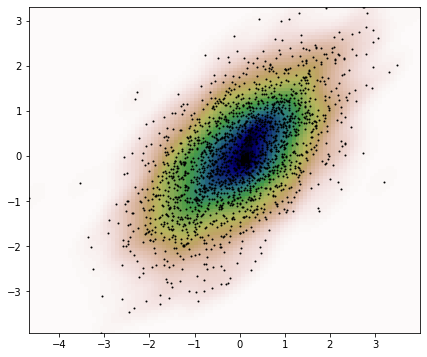

In [76]:
def measure(n):
    """Measurement model, return two coupled measurements."""
    m1 = np.random.normal(size=n)
    m2 = np.random.normal(scale=0.5, size=n)
    return m1+m2, m1-m2

m1, m2 = measure(2000)
xmin = m1.min()
xmax = m1.max()
ymin = m2.min()
ymax = m2.max()

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel.evaluate(positions).T, X.shape)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,
          extent=[xmin, xmax, ymin, ymax])
ax.plot(m1, m2, 'k.', markersize=2)

ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

plt.show()

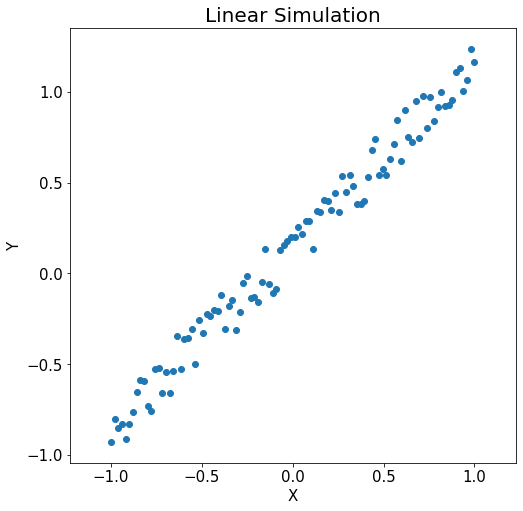

In [77]:
from scipy.stats import multiscale_graphcorr

def mgc_plot(x, y, sim_name, mgc_dict=None, only_viz=False,
             only_mgc=False):
    """Plot sim and MGC-plot"""
    if not only_mgc:
        # simulation
        plt.figure(figsize=(8, 8))
        ax = plt.gca()
        ax.set_title(sim_name + " Simulation", fontsize=20)
        ax.scatter(x, y)
        ax.set_xlabel('X', fontsize=15)
        ax.set_ylabel('Y', fontsize=15)
        ax.axis('equal')
        ax.tick_params(axis="x", labelsize=15)
        ax.tick_params(axis="y", labelsize=15)
        plt.show()
    if not only_viz:
        # local correlation map
        plt.figure(figsize=(8,8))
        ax = plt.gca()
        mgc_map = mgc_dict["mgc_map"]
        # draw heatmap
        ax.set_title("Local Correlation Map", fontsize=20)
        im = ax.imshow(mgc_map, cmap='YlGnBu')
        # colorbar
        cbar = ax.figure.colorbar(im, ax=ax)
        cbar.ax.set_ylabel("", rotation=-90, va="bottom")
        ax.invert_yaxis()
        # Turn spines off and create white grid.
        for edge, spine in ax.spines.items():
            spine.set_visible(False)
        # optimal scale
        opt_scale = mgc_dict["opt_scale"]
        ax.scatter(opt_scale[0], opt_scale[1],
                   marker='X', s=200, color='red')
        # other formatting
        ax.tick_params(bottom="off", left="off")
        ax.set_xlabel('#Neighbors for X', fontsize=15)
        ax.set_ylabel('#Neighbors for Y', fontsize=15)
        ax.tick_params(axis="x", labelsize=15)
        ax.tick_params(axis="y", labelsize=15)
        ax.set_xlim(0, 100)
        ax.set_ylim(0, 100)
        plt.show()
        
np.random.seed(12345678)
x = np.linspace(-1, 1, num=100)
y = x + 0.3 * np.random.random(x.size)

mgc_plot(x, y, "Linear", only_viz=True)

MGC test statistic:  1.0
P-value:  0.0


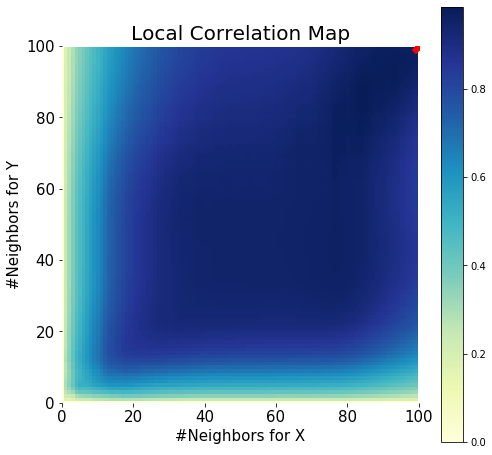

In [78]:
stat, pvalue, mgc_dict = multiscale_graphcorr(x, y)
print("MGC test statistic: ", round(stat, 1))
print("P-value: ", round(pvalue, 1))
mgc_plot(x, y, "Linear", mgc_dict, only_mgc=True)

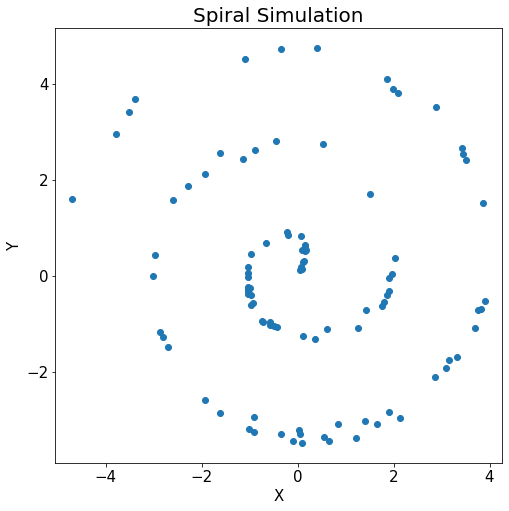

In [79]:
np.random.seed(12345678)
unif = np.array(np.random.uniform(0, 5, size=100))
x = unif * np.cos(np.pi * unif)
y = unif * np.sin(np.pi * unif) + 0.4 * np.random.random(x.size)

mgc_plot(x, y, "Spiral", only_viz=True)

MGC test statistic:  0.2
P-value:  0.0


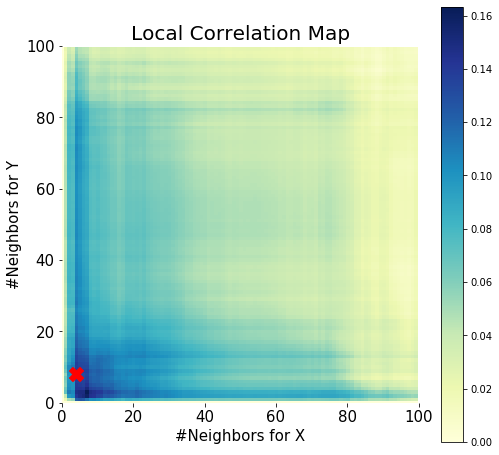

In [80]:
stat, pvalue, mgc_dict = multiscale_graphcorr(x, y)
print("MGC test statistic: ", round(stat, 1))
print("P-value: ", round(pvalue, 1))
mgc_plot(x, y, "Spiral", mgc_dict, only_mgc=True)